In [1]:
import pandas as pd
import json
import xml.etree.ElementTree as ET

In [2]:
df_xlsx = pd.read_excel('/content/jo/olympic_medals.xlsx')
print("Colonnes XLSX :", df_xlsx.columns.tolist())

Colonnes XLSX : ['Unnamed: 0', 'discipline_title', 'slug_game', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_name', 'country_code', 'country_3_letter_code']


In [3]:
df_json = pd.read_json('/content/jo/olympic_athletes.json')
print("Colonnes JSON :", df_json.columns.tolist())

Colonnes JSON : ['athlete_url', 'athlete_full_name', 'games_participations', 'first_game', 'athlete_year_birth', 'athlete_medals', 'bio']


In [4]:
df_html = pd.read_html('/content/jo/olympic_results.html')
print("Colonnes HTML (Tableau 1) :", df_html[0].columns.tolist())

Colonnes HTML (Tableau 1) : ['Unnamed: 0', 'discipline_title', 'event_title', 'slug_game', 'participant_type', 'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name', 'country_code', 'country_3_letter_code', 'athlete_url', 'athlete_full_name', 'value_unit', 'value_type']


In [5]:
try:
    df_xml = pd.read_xml('/content/jo/olympic_hosts.xml')
    print("Colonnes XML :", df_xml.columns.tolist())
except Exception as e:
    print("Erreur XML : structure probablement trop complexe pour une lecture directe.")

Colonnes XML : ['index', 'game_slug', 'game_end_date', 'game_start_date', 'game_location', 'game_name', 'game_season', 'game_year']


In [6]:
import pandas as pd

# Fusions des colonnes
cols_to_keep = ['discipline_title', 'slug_game', 'event_title',
                'medal_type', 'participant_type', 'athlete_full_name', 'athlete_url',
                'country_name', 'country_3_letter_code']

# On concatène les deux sources de résultats
df_results = pd.concat([df_xlsx[cols_to_keep], df_html[0][cols_to_keep]], ignore_index=True)
df_results = df_results.drop_duplicates()

# Ajout JSON
df_merged = pd.merge(df_results, df_json, on='athlete_url', how='left', suffixes=('', '_drop'))

# Supprimer les colonnes doublons
df_merged = df_merged.drop([c for c in df_merged.columns if '_drop' in c], axis=1)

# Contexte des jeux
df_final = pd.merge(df_merged, df_xml, left_on='slug_game', right_on='game_slug', how='left')

# Nettoyage
cols_inutiles = ['Unnamed: 0', 'index', 'game_slug']
df_final = df_final.drop(columns=[c for c in cols_inutiles if c in df_final.columns])

print(f"Fusion terminée ! Taille du dataset final : {df_final.shape}")
df_final.head()

Fusion terminée ! Taille du dataset final : (167335, 20)


,discipline_title,slug_game,event_title,medal_type,participant_type,athlete_full_name,athlete_url,country_name,country_3_letter_code,games_participations,first_game,athlete_year_birth,athlete_medals,bio,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,beijing-2022,Mixed Doubles,GOLD,GameTeam,Stefania CONSTANTINI,https://olympics.com/en/athletes/stefania-cons...,Italy,ITA,1.0,Beijing 2022,1999.0,\n\n\n1\n\nG\n\n,None,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Curling,beijing-2022,Mixed Doubles,GOLD,GameTeam,Amos MOSANER,https://olympics.com/en/athletes/amos-mosaner,Italy,ITA,2.0,PyeongChang 2018,1995.0,\n\n\n1\n\nG\n\n,None,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,beijing-2022,Mixed Doubles,SILVER,GameTeam,Kristin SKASLIEN,https://olympics.com/en/athletes/kristin-skaslien,Norway,NOR,2.0,PyeongChang 2018,1986.0,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,None,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Curling,beijing-2022,Mixed Doubles,SILVER,GameTeam,Magnus NEDREGOTTEN,https://olympics.com/en/athletes/magnus-nedreg...,Norway,NOR,2.0,PyeongChang 2018,1990.0,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,None,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,beijing-2022,Mixed Doubles,BRONZE,GameTeam,Almida DE VAL,https://olympics.com/en/athletes/almida-de-val,Sweden,SWE,1.0,Beijing 2022,1997.0,\n\n\n1\n\nB\n\n,None,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


## Graphes

### Pays qui dominent

/tmp/ipython-input-3638853631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, x='country_name', order=top_countries, palette='viridis')


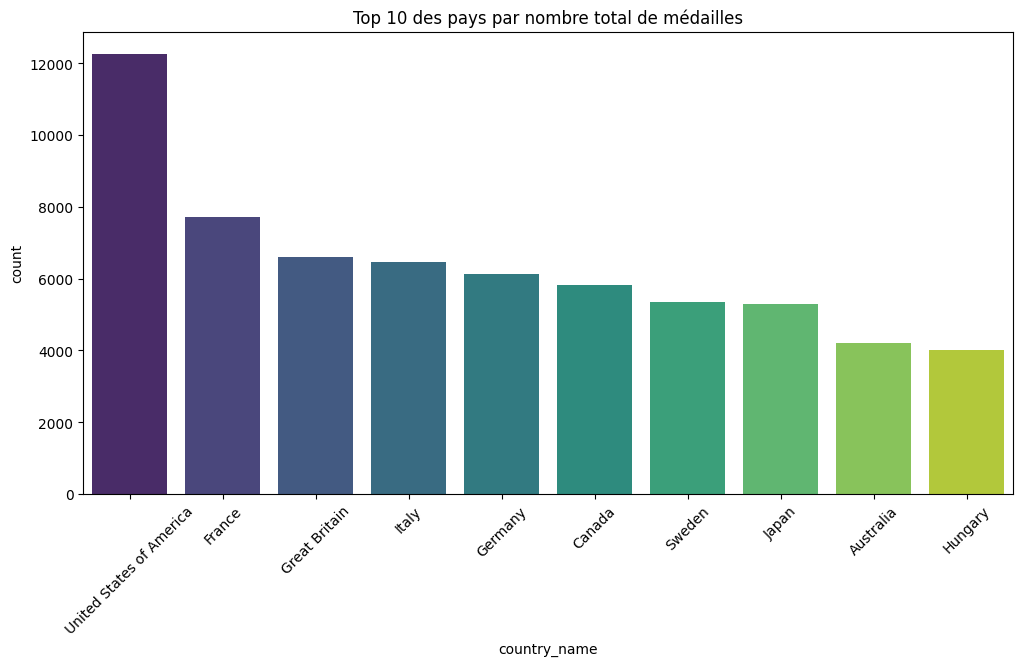

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 des pays les plus médaillés historiquement
top_countries = df_final['country_name'].value_counts().head(10).index
df_top = df_final[df_final['country_name'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='country_name', order=top_countries, palette='viridis')
plt.title('Top 10 des pays par nombre total de médailles')
plt.xticks(rotation=45)
plt.show()

### Âge des médaillés

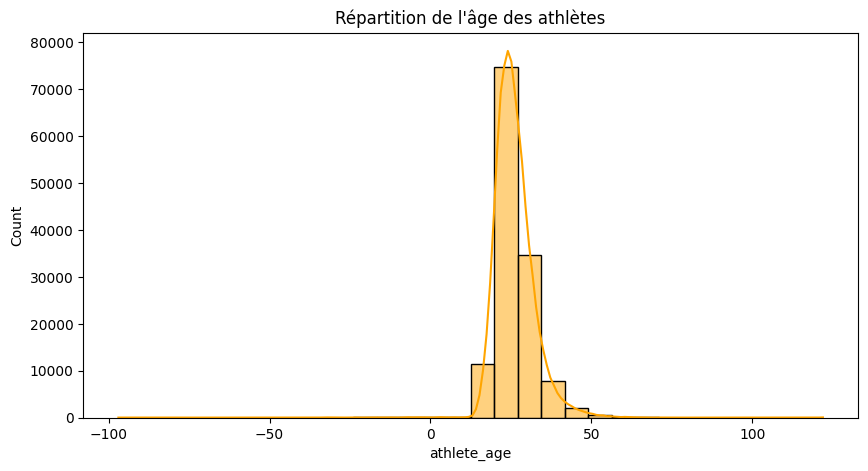

In [8]:
df_final['athlete_age'] = df_final['game_year'] - df_final['athlete_year_birth']

plt.figure(figsize=(10,5))
sns.histplot(df_final['athlete_age'].dropna(), bins=30, kde=True, color='orange')
plt.title('Répartition de l\'âge des athlètes')
plt.show()

## Cases vides

### Médailles

In [9]:
df_final['medal_type'] = df_final['medal_type'].fillna('No Medal')

### Manque d'info

In [10]:
df_final = df_final.dropna(subset=['athlete_year_birth', 'country_3_letter_code'])

In [11]:
print(df_final.isnull().sum())

discipline_title             0
slug_game                    0
event_title                  0
medal_type                   0
participant_type             0
athlete_full_name            0
athlete_url                  0
country_name                 0
country_3_letter_code        0
games_participations         0
first_game                  69
athlete_year_birth           0
athlete_medals           91654
bio                      86928
game_end_date                0
game_start_date              0
game_location                0
game_name                    0
game_season                  0
game_year                    0
athlete_age                  0
dtype: int64


## Création de colonne

### Âge au moment des jeux

In [12]:
df_final['age_at_game'] = df_final['game_year'] - df_final['athlete_year_birth']

## Feature Engineering

### Pays hôte

In [13]:
df_final['is_host'] = (df_final['country_name'] == df_final['game_location']).astype(int)

print("Colonne 'is_host' créée.")

Colonne 'is_host' créée.


### Expérience

In [14]:
import re

def count_medals_text(text):
    if pd.isna(text): return 0
    return len(re.findall(r'\b[GSB]\b', str(text)))

df_final['athlete_prev_medals'] = df_final['athlete_medals'].apply(count_medals_text)

print("Colonne 'athlete_prev_medals' créée.")

Colonne 'athlete_prev_medals' créée.


### Force du pays

In [15]:
df_gagnants = df_final[df_final['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]

stats_pays_sport = df_gagnants.groupby(['country_3_letter_code', 'discipline_title']).size().reset_index(name='country_sport_score')

if 'country_sport_score' in df_final.columns:
    df_final = df_final.drop(columns=['country_sport_score'])

df_final = pd.merge(df_final, stats_pays_sport, on=['country_3_letter_code', 'discipline_title'], how='left')

df_final['country_sport_score'] = df_final['country_sport_score'].fillna(0).astype(int)

print("La colonne 'country_sport_score' a été créée avec succès !")
print(f"Colonnes actuelles : {df_final.columns.tolist()[-3:]}")

La colonne 'country_sport_score' a été créée avec succès !
Colonnes actuelles : ['is_host', 'athlete_prev_medals', 'country_sport_score']


In [16]:
cols_a_supprimer = [c for c in df_final.columns if '_x' in c or '_y' in c]
if cols_a_supprimer:
    df_final = df_final.drop(columns=cols_a_supprimer)

print("Colonnes nettoyées !")
print(f"Colonnes actuelles : {df_final.columns.tolist()[-3:]}")

Colonnes nettoyées !
Colonnes actuelles : ['is_host', 'athlete_prev_medals', 'country_sport_score']


## Colonne pour IA

In [17]:
import re
import pandas as pd

if 'game_year' not in df_final.columns and \
   'slug_game' in df_final.columns and \
   'df_xml' in locals():
    print("TENTATIVE DE RÉCUPÉRATION : 'game_year' est absent de df_final. Re-fusion avec df_xml.")

    df_xml_for_merge = df_xml[['game_slug', 'game_year']].copy()

    df_final = pd.merge(df_final, df_xml_for_merge, left_on='slug_game', right_on='game_slug', how='left')

    if 'game_slug' in df_final.columns and 'game_slug' != 'slug_game':
        df_final = df_final.drop(columns=['game_slug'])

    if 'game_year' in df_final.columns:
        print("Récupération de 'game_year' effectuée avec succès.")
    else:
        print("ÉCHEC DE LA RÉCUPÉRATION : 'game_year' n'a pas été ajouté.")
elif 'game_year' not in df_final.columns:
    print("Alerte : 'game_year' absent de df_final et impossible de le récupérer via df_xml.")


if 'athlete_year_birth' not in df_final.columns and \
   'athlete_url' in df_final.columns and \
   'df_json' in locals():
    print("TENTATIVE DE RÉCUPÉRATION : 'athlete_year_birth' est absent de df_final. Re-fusion avec df_json.")
    df_json_for_merge_ayb = df_json[['athlete_url', 'athlete_year_birth']].copy()

    df_final = pd.merge(df_final, df_json_for_merge_ayb, on='athlete_url', how='left', suffixes=('', '_json_recovered'))

    if 'athlete_year_birth_json_recovered' in df_final.columns:
        if 'athlete_year_birth' in df_final.columns and 'athlete_year_birth_json_recovered' in df_final.columns:
            df_final['athlete_year_birth'] = df_final['athlete_year_birth'].fillna(df_final['athlete_year_birth_json_recovered'])
            df_final = df_final.drop(columns=['athlete_year_birth_json_recovered'])
        elif 'athlete_year_birth_json_recovered' in df_final.columns:
            df_final['athlete_year_birth'] = df_final['athlete_year_birth_json_recovered']
            df_final = df_final.drop(columns=['athlete_year_birth_json_recovered'])

    if 'athlete_year_birth' in df_final.columns:
        print("Récupération de 'athlete_year_birth' effectuée avec succès.")
    else:
        print("ÉCHEC DE LA RÉCUPÉRATION : 'athlete_year_birth' n'a pas été ajouté.")
elif 'athlete_year_birth' not in df_final.columns:
    print("Alerte : 'athlete_year_birth' absent de df_final et impossible de le récupérer via df_json.")


if 'game_year' in df_final.columns and 'athlete_year_birth' in df_final.columns:
    df_final['athlete_age'] = df_final['game_year'] - df_final['athlete_year_birth']
    print("Calcul de 'athlete_age' effectué avec succès.")
else:
    df_final['athlete_age'] = pd.NA
    print("Alerte: Impossible de calculer 'athlete_age' car 'game_year' ou 'athlete_year_birth' est manquant après toutes les tentatives de récupération.")

df_final['is_host'] = (df_final['country_name'] == df_final['game_location']).astype(int)

def count_medals_text(text):
    if pd.isna(text): return 0
    return len(re.findall(r'\b[GSB]\b', str(text)))
df_final['athlete_prev_medals'] = df_final['athlete_medals'].apply(count_medals_text)

df_gagnants = df_final[df_final['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]
stats_pays_sport = df_gagnants.groupby(['country_3_letter_code', 'discipline_title']).size().reset_index(name='country_sport_score')

if 'country_sport_score' in df_final.columns:
    df_final = df_final.drop(columns=['country_sport_score'])
df_final = pd.merge(df_final, stats_pays_sport, on=['country_3_letter_code', 'discipline_title'], how='left')
df_final['country_sport_score'] = df_final['country_sport_score'].fillna(0).astype(int)

cols_pour_ia = [
    'discipline_title', 'participant_type', 'country_3_letter_code',
    'games_participations', 'game_season', 'game_year', 'athlete_age',
    'medal_type', 'is_host', 'country_sport_score', 'athlete_prev_medals'
]

manquantes = [c for c in cols_pour_ia if c not in df_final.columns]
if manquantes:
    print(f"Erreur persistante ! Il manque : {manquantes}")
else:
    df_ia = df_final[cols_pour_ia].copy()
    print("Succès ! df_ia est prêt avec les nouvelles colonnes.")

TENTATIVE DE RÉCUPÉRATION : 'game_year' est absent de df_final. Re-fusion avec df_xml.
Récupération de 'game_year' effectuée avec succès.
TENTATIVE DE RÉCUPÉRATION : 'athlete_year_birth' est absent de df_final. Re-fusion avec df_json.
Récupération de 'athlete_year_birth' effectuée avec succès.
Calcul de 'athlete_age' effectué avec succès.
Succès ! df_ia est prêt avec les nouvelles colonnes.


In [18]:
import re

if 'game_year' not in df_final.columns:
    print("Alerte : game_year absent. Vérifiez la fusion XML.")

if 'game_year' in df_final.columns and 'athlete_year_birth' in df_final.columns:
    df_final['athlete_age'] = df_final['game_year'] - df_final['athlete_year_birth']

df_final['is_host'] = (df_final['country_name'] == df_final['game_location']).astype(int)

def count_medals_text(text):
    if pd.isna(text): return 0
    return len(re.findall(r'\b[GSB]\b', str(text)))
df_final['athlete_prev_medals'] = df_final['athlete_medals'].apply(count_medals_text)

df_gagnants = df_final[df_final['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]
stats_pays_sport = df_gagnants.groupby(['country_3_letter_code', 'discipline_title']).size().reset_index(name='country_sport_score')

if 'country_sport_score' in df_final.columns:
    df_final = df_final.drop(columns=['country_sport_score'])
df_final = pd.merge(df_final, stats_pays_sport, on=['country_3_letter_code', 'discipline_title'], how='left')
df_final['country_sport_score'] = df_final['country_sport_score'].fillna(0).astype(int)

cols_pour_ia = [
    'discipline_title', 'participant_type', 'country_3_letter_code',
    'games_participations', 'game_season', 'game_year', 'athlete_age',
    'medal_type', 'is_host', 'country_sport_score', 'athlete_prev_medals'
]

manquantes = [c for c in cols_pour_ia if c not in df_final.columns]
if manquantes:
    print(f"Erreur persistante ! Il manque : {manquantes}")
else:
    df_ia = df_final[cols_pour_ia].copy()
    print("Succès ! df_ia est prêt avec les nouvelles colonnes.")

Succès ! df_ia est prêt avec les nouvelles colonnes.


In [19]:
print("Liste des colonnes envoyées à l'IA :")
print(df_ia.columns.tolist())

Liste des colonnes envoyées à l'IA :
['discipline_title', 'participant_type', 'country_3_letter_code', 'games_participations', 'game_season', 'game_year', 'athlete_age', 'medal_type', 'is_host', 'country_sport_score', 'athlete_prev_medals']


In [20]:
print(df_ia.dtypes)

discipline_title          object
participant_type          object
country_3_letter_code     object
games_participations     float64
game_season               object
game_year                  int64
athlete_age              float64
medal_type                object
is_host                    int64
country_sport_score        int64
athlete_prev_medals        int64
dtype: object


In [21]:
print(df_ia.isnull().sum())

discipline_title         0
participant_type         0
country_3_letter_code    0
games_participations     0
game_season              0
game_year                0
athlete_age              0
medal_type               0
is_host                  0
country_sport_score      0
athlete_prev_medals      0
dtype: int64


## Nettoyage

In [22]:
df_clean = df_ia.copy()

print("Bloc 1 validé : Copie de sécurité créée.")

Bloc 1 validé : Copie de sécurité créée.


## Mapping

In [23]:
mapping = {'GOLD': 3, 'SILVER': 2, 'BRONZE': 1}

df_clean['target'] = df_clean['medal_type'].map(mapping).fillna(0).astype(int)

if 'medal_type' in df_clean.columns:
    df_clean = df_clean.drop(columns=['medal_type'])

print("Bloc 2 validé : Cible 'target' créée (0, 1, 2, 3).")

Bloc 2 validé : Cible 'target' créée (0, 1, 2, 3).


### Trous vides

In [24]:
cols_a_remplir = ['games_participations', 'athlete_prev_medals', 'country_sport_score']

for col in cols_a_remplir:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0).astype(int)

df_clean = df_clean.dropna(subset=['athlete_age'])
df_clean['athlete_age'] = df_clean['athlete_age'].astype(int)

print("Bloc 3 validé : Trous bouchés et types numériques corrigés.")

Bloc 3 validé : Trous bouchés et types numériques corrigés.


### Encodage

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_texte = ['discipline_title', 'participant_type', 'country_3_letter_code', 'game_season']

for col in cols_texte:
    if col in df_clean.columns:
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

print("Bloc 4 validé : Tout le texte a été transformé en IDs numériques.")

Bloc 4 validé : Tout le texte a été transformé en IDs numériques.


## Vérification

In [26]:
print("--- VÉRIFICATION ---")
print(f"Cases vides restantes : {df_clean.isnull().sum().sum()}")
print("\nTypes des colonnes :")
print(df_clean.dtypes)

--- VÉRIFICATION ---
Cases vides restantes : 0

Types des colonnes :
discipline_title         int64
participant_type         int64
country_3_letter_code    int64
games_participations     int64
game_season              int64
game_year                int64
athlete_age              int64
is_host                  int64
country_sport_score      int64
athlete_prev_medals      int64
target                   int64
dtype: object


## Nettoyage

In [27]:

df_good = df_ia[(df_ia['athlete_age'] >= 12) & (df_ia['athlete_age'] <= 75)].copy()

cols_to_fix = ['games_participations', 'game_year', 'athlete_age']
for col in cols_to_fix:
    df_good[col] = df_good[col].astype(int)

print(f"Taille avant nettoyage : {len(df_ia)}")
print(f"Taille après nettoyage : {len(df_good)}")
print("\nNouvelles statistiques de l'âge :")
print(df_good['athlete_age'].describe())

Taille avant nettoyage : 131679
Taille après nettoyage : 131402

Nouvelles statistiques de l'âge :
count    131402.000000
mean         26.192645
std           5.888212
min          12.000000
25%          22.000000
50%          25.000000
75%          29.000000
max          75.000000
Name: athlete_age, dtype: float64


In [28]:
df_good = df_good.drop_duplicates()

## Extraire les données

In [35]:
df_clean.to_csv('donnees_olympiques_clean_final.csv', index=False)
print("Sauvegarde terminée !")

Sauvegarde terminée !
